Last Updated: 7-29-2017

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Aggregation-with-dissolve" data-toc-modified-id="Aggregation-with-dissolve-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aggregation with dissolve</a></div><div class="lev2 toc-item"><a href="#dissolve-Example" data-toc-modified-id="dissolve-Example-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><code>dissolve</code> Example</a></div>

# Aggregation with dissolve

- It is often the case that we find ourselves working with spatial data that is more granular than we need. For example, we might have data on sub-national units, but we are actually interested in studying patterns at the level of countries.

- In a non-spatial setting, we aggregate our data using the ```groupby``` function. But when working with spatial data, we need a special tool that can also aggregrate geometric features. In the geopandas library, that functionality is provided by the ```dissolve``` function.

- ```dissolve``` can be thought of as doing three things:
    - It dissolves all the geometries within a given group together into a single geometric feature (using the ```unary_union``` method)
    - It aggregrates all the rows of data in a group using ```grouby.aggregrate()```, and 
    - It combines those two results.
    
    

## ```dissolve``` Example

Suppose we are interested in studying continents, but we only have country-level data like the country dataset included in geopandas. We can easily convert this to a continent-level dataset.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 20)
from shapely.geometry import Point, Polygon

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
world = world[['continent', 'geometry']]
world.head()

,continent,geometry
0,Asia,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,Africa,(POLYGON ((16.32652835456705 -5.87747039146621...
2,Europe,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,Asia,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,South America,(POLYGON ((-65.50000000000003 -55.199999999999...


In [4]:
continents = world.dissolve(by='continent')
continents

,geometry
continent,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...
Antarctica,(POLYGON ((-159.2081835601977 -79.497059421708...
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...
Europe,(POLYGON ((-52.55642473001839 2.50470530843705...
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1..."
Oceania,(POLYGON ((173.0203747907408 -40.9190524228564...
Seven seas (open ocean),"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
South America,(POLYGON ((-68.63401022758316 -52.636370458874...


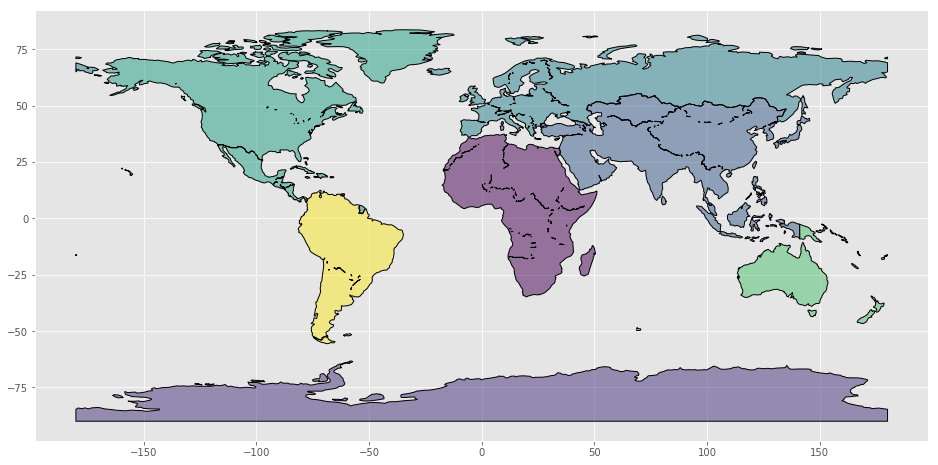

In [5]:
continents.plot()